In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.svm import NuSVR
from scipy.stats import norm
from sklearn import svm
import lightgbm as lgb
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import warnings
import time
import os
import sys
import gc
import glob
%matplotlib inline

/Users/adeluabideenadeleye/anaconda3/envs/iris_project/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


### for better result, set fold_n = 5

In [3]:
fold_n = 5
folds = StratifiedKFold(n_splits=fold_n, shuffle=True, random_state=10)
%precision 4
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
pd.set_option("display.precision", 15)

### check versions of libraries

In [4]:
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

pandas: 0.24.1
numpy: 1.16.2
Python: 3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


### Evaluation of submission

In [5]:
from sklearn.metrics import roc_auc_score

## Exploratory Data Analysis

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
#train.head()

In [8]:
#test.head()

In [9]:
#train.shape

In [10]:
#test.shape

In [11]:
#train.columns

In [12]:
#train.info(memory_usage='deep')

## Numerical value describe

In [13]:
#train.describe()

## Data Visualization

In [14]:
#train['target'].value_counts(normalize=True).plot.bar()

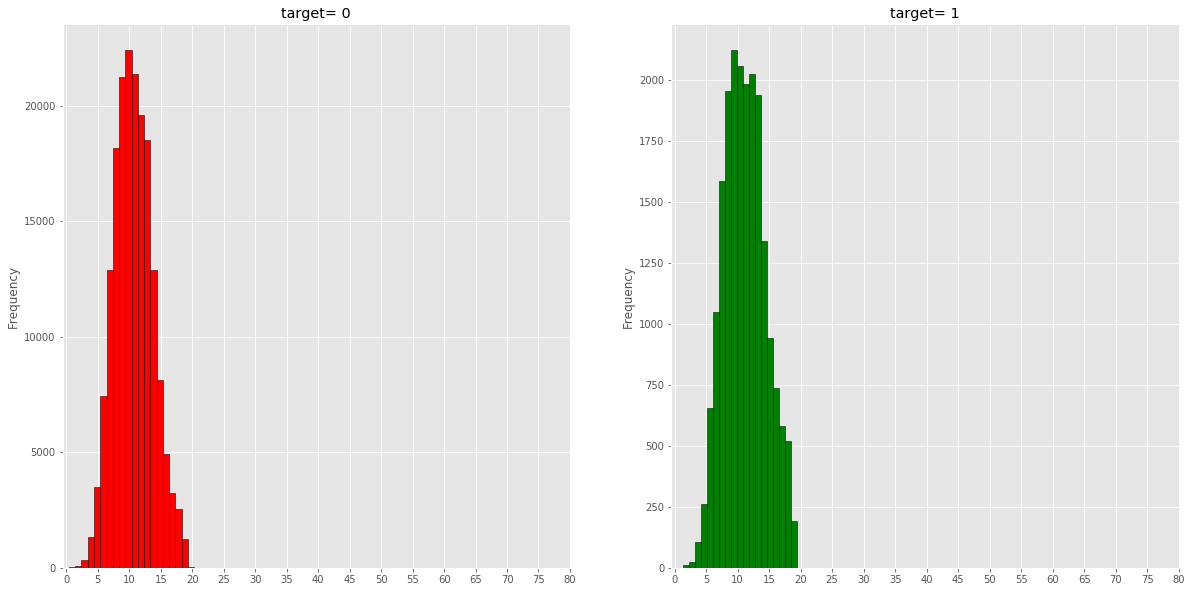

In [15]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['target']==0].var_0.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('target= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['target']==1].var_0.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('target= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

## Mean Frequency

In [16]:
#train[train.columns[2:]].mean().plot('hist')
#plt.title('Mean Frequency')

In [17]:
#train['var_0'].hist()

In [18]:
#train['var_173'].hist()

In [19]:
#train['var_103'].hist()

## displot

In [20]:
#sns.set(rc={'figure.figsize': (9,7)})
#sns.distplot(train['target'])

## Violinplot

In [21]:
#sns.violinplot(data=train, x='target', y='var_0')

In [22]:
#sns.violinplot(data=train, x='target', y='var_71')

In [23]:
#sns.violinplot(data=train, x='target', y='var_183')

## Data Preprocessing

In [24]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [25]:
check_missing_data(train)

False

In [26]:
check_missing_data(test)

False

## Binary Classification

In [27]:
#train['target'].unique()

## Data set imbalance

In [28]:
#train['target'].value_counts(normalize=True)

## Measure skewness and kurtosis

In [29]:
#print("Skewness: %f" % train['target'].skew())
#print("Kurtosis: %f" % train['target'].kurt())

## Data Preparation

In [30]:
cols = ['ID_code', 'target']
X = train.drop(cols, axis=1)
y = train['target']

In [31]:
X_test = test.drop('ID_code', axis=1)

## Split the train dataset using train/test split

In [32]:
X_train, val_X, y_train, val_y = train_test_split(X, y, test_size=0.3, random_state=1)

## Implement the RandomForestClassifier

In [33]:
rfc_model = RandomForestClassifier(random_state=0)

In [34]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Calculating and Showing Importance using eli5 library

In [35]:
#import eli5
#from eli5.sklearn import PermutationImportance

In [36]:
#perm = PermutationImportance(rfc_model, random_state=1).fit(val_X, val_y)

In [37]:
#eli5.show_weights(perm, feature_names = val_X.columns.tolist(), top=150)

In [38]:
X_train, val_X, y_train, val_y = train_test_split(X, y, test_size=0.3, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(X_train, y_train)

In [39]:
features = [c for c in train.columns if c not in ['ID_code', 'target']]

In [40]:
#from sklearn import tree
#import graphviz
#tree_graph = tree.export_graphviz(tree_model, out_file='ct-prediction.dot', feature_names=features)

## Partial Dependence Plot

In [41]:
from pdpbox import pdp, get_dataset, info_plots

ModuleNotFoundError: No module named 'pdpbox'

In [ ]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=features, feature='var_81')

In [ ]:
## plot
pdp.pdp_plot(pdp_goals, 'var_81')
plt.show()

## y axis is the change in prediction from what it would be predicted at the baseline
## The blue shaded area represents level of confidence

In [ ]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=features, feature='var_82')
## plot
pdp.pdp_plot(pdp_goals, 'var_82')
plt.show()

In [ ]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=features, feature='var_139')
## plot
pdp.pdp_plot(pdp_goals, 'var_139')
plt.show()

In [ ]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=features, feature='var_110')
## plot
pdp.pdp_plot(pdp_goals, 'var_110')
plt.show()

## lightgbm

In [43]:
# based on following kernel https://www.kaggle.com/dromosys/sctp-working-lgb
params = {'num_leaves': 9,
         'min_data_in_leaf': 42,
         'objective': 'binary',
         'max_depth': 16,
         'learning_rate': 0.0123,
         'boosting': 'gbdt',
         'bagging_freq': 5,
         'bagging_fraction': 0.8,
         'feature_fraction': 0.8201,
         'bagging_seed': 11,
         'reg_alpha': 1.728910519108444,
         'reg_lambda': 4.9847051755586085,
         'random_state': 42,
         'metric': 'auc',
         'verbosity': -1,
         'subsample': 0.81,
         'min_gain_to_split': 0.01077313523861969,
         'min_child_weight': 19.428902804238373,
         'num_threads': 4}

In [44]:
%%time
y_pred_lgb = np.zeros(len(X_test))
for fold_n, (train_index, valid_index) in enumerate(folds.split(X,y)):
    print('Fold', fold_n, 'started at', time.ctime())
    X_tr, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_tr, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    train_data = lgb.Dataset(X_tr, label=y_tr)
    valid_data = lgb.Dataset(X_valid, label=y_valid)
        
    lgb_model = lgb.train(params,train_data,num_boost_round=2000,#change 20 to 2000
                    valid_sets = [train_data, valid_data],verbose_eval=300,early_stopping_rounds = 200)##change 10 to 200
            
    y_pred_lgb += lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)/5

Fold 0 started at Fri Mar  8 23:18:43 2019
Training until validation scores don't improve for 200 rounds.
[300]	training's auc: 0.833564	valid_1's auc: 0.811675
[600]	training's auc: 0.867848	valid_1's auc: 0.84136
[900]	training's auc: 0.885227	valid_1's auc: 0.856314
[1200]	training's auc: 0.896729	valid_1's auc: 0.86598
[1500]	training's auc: 0.904799	valid_1's auc: 0.872299
[1800]	training's auc: 0.911206	valid_1's auc: 0.877422
Did not meet early stopping. Best iteration is:
[2000]	training's auc: 0.914416	valid_1's auc: 0.879595
Fold 1 started at Fri Mar  8 23:20:05 2019
Training until validation scores don't improve for 200 rounds.
[300]	training's auc: 0.831021	valid_1's auc: 0.821954
[600]	training's auc: 0.866447	valid_1's auc: 0.853076
[900]	training's auc: 0.884155	valid_1's auc: 0.867669
[1200]	training's auc: 0.895765	valid_1's auc: 0.876575
[1500]	training's auc: 0.903851	valid_1's auc: 0.882447
[1800]	training's auc: 0.909834	valid_1's auc: 0.886699
Did not meet early s

In [47]:
y_pred_rfc = rfc_model.predict(X_test)

In [48]:
y_pred_tree = tree_model.predict(X_test)

## CatBoostClassifier

In [49]:
train_pool = Pool(X_train,y_train)
cat_model = CatBoostClassifier(
                               iterations=3000,# change 25 to 3000 to get best performance 
                               learning_rate=0.03,
                               objective="Logloss",
                               eval_metric='AUC',
                              )
cat_model.fit(X_train,y_train,silent=True)
y_pred_cat = cat_model.predict(X_test)

## Generate submission files

In [50]:
submission_rfc = pd.DataFrame({'ID_code':test['ID_code'], 'target': y_pred_rfc}).set_index('ID_code').to_csv('submission_rfc.csv')

In [51]:
submission_tree = pd.DataFrame({'ID_code':test['ID_code'], 'target': y_pred_tree}).set_index('ID_code').to_csv('submission_tree.csv')

In [52]:
submission_cat = pd.DataFrame({'ID_code':test['ID_code'], 'target': y_pred_cat}).set_index('ID_code').to_csv('submission_cat.csv')

In [53]:
submission_rfc_cat = pd.DataFrame({'ID_code':test['ID_code'], 'target': (y_pred_rfc + y_pred_cat)/2}).set_index('ID_code').to_csv('submission_rfc_cat.csv')

In [58]:
submission_lgb = pd.DataFrame({'ID_code':test['ID_code'], 'target': y_pred_lgb}).set_index('ID_code').to_csv('submission_lgb.csv')

In [56]:
submission_lgb_cat = pd.DataFrame({'ID_code':test['ID_code'], 'target': (y_pred_lgb + y_pred_cat)/2}).to_csv('submission_lgb_cat.csv', index=False)

In [57]:
submission_rfc_lgb = pd.DataFrame({'ID_code':test['ID_code'], 'target': (y_pred_lgb + y_pred_rfc)/2}).to_csv('submission_rfc_lgb.csv', index=False)